# 함수형으로 코드를 작성할때 많이 사용하는 함수들
---


## 1. MAP

map이란 말그대로 특정 원소들을 순차적으로 매핑하는 연산을 말합니다.  
적용 되는 함수는 여러가지 이며 배열과 함수를 인자값으로 받습니다.  

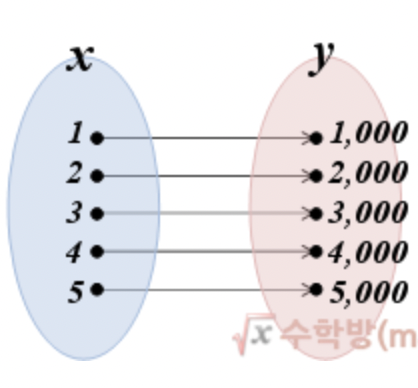

In [9]:
input_arr = [ 1,2,3,4,5 ]

def f(x):
    print(f"multiply 1000 {x}")
    return x * 1000

for i in map(f, input_arr):
    print(i)

multiply 1000 1
1000
multiply 1000 2
2000
multiply 1000 3
3000
multiply 1000 4
4000
multiply 1000 5
5000


결과값이 의도한 [ 1000, 2000, 3000, 4000, 5000 ]이 나오지 않았습니다.  
이는 아직 map이 평가(evaluate)되지 않아서 인데요,

아래와 같이 map을 실제 연산된 리스트로 변환합니다.

In [3]:
input_arr = [ 1,2,3,4,5 ]
f = lambda x : x * 1000

[ *map(f, input_arr) ]

[1000, 2000, 3000, 4000, 5000]

In [6]:
for e in map(f, input_arr): 
    print(e)

1000
2000
3000
4000
5000


그렇다면 왜 map 함수는 바로 결과값을 반환하지 않는 걸까요?  
map은 generator를 반환합니다.    
  
함수형 프로그래밍에서는 또 하나의 중요한 개념인 계산지연(lazy evaluation)이라는 개념이 있습니다.  

컴퓨터 프로그래밍에서 느긋한 계산법(Lazy evaluation)은 계산의 결과값이 필요할 때까지 계산을 늦추는 기법입니다.  

이로 인한 계산이 실제 필요하기 전까지 다른 연산을 빠르게 수행할 수 있고, 연산을 추상화하고 조합하며 최적화하는데 매우 큰 도움이 되는 기법입니다.  

# filter
---

파이썬의 내장 함수인 filter()는 여러 개의 데이터로 부터 일부의 데이터만 추려낼 때 사용합니다.  
따라서, 여러 개의 데이터를 담고 있는 list나 tuple을 대상으로 주로 사용하는 함수입니다.  

사용방법은 아래와 같습니다.  

filter(조건 함수, 순회 가능한 데이터)  
filter() 함수는 두번째 인자로 넘어온 데이터 중에서 첫번째 인자로 넘어온 조건 함수를 만족하는 데이터만을 반환합니다.  

map이 모든 원소에 대해 변환 연산을 수행한것과는 차이가 있습니다.

In [12]:
input_arr = [ 1,2,3,4,5,6 ]
f = lambda x : x % 2 == 0

for x in filter(f, input_arr):
    print(x)

2
4
6


위와 같이 x % 2가 0인, 즉 짝수인 원소들만 추리고 싶을때에 위와 같이 filter함수를 사용합니다.  
조건식 또한 다양하게 적용할 수 있어 매우 많이 사용되는 함수입니다.  

### Filter 함수 실습 하기
---

실습 1  

input_arr이 [ 1, -4, 9, 12, -15 ] 라고 할 때 원소의 제곱이 81이상인 원소만 추리고자 합니다.  
filter 함수를 활용하여 해결해 봅시다.  

In [13]:
input_arr = [ 1, -4, 9, 12, -15 ]
f = lambda x: (x ** 2) >= 81
[ *filter(f, input_arr) ] 

[9, 12, -15]

실습 2  

input_arr 의 모든 원소의 절대값에서 10을 빼주고, 이 결과가 0 이상인 원소들만 추리고자 합니다.  
map 함수와 filter 함수를 조합하여 해결해 봅시다.  

In [15]:
input_arr = [ 1, -4, 9, 12, -15 ]

f0 = lambda x : abs(x) - 10
minus_10 = map(f0, input_arr)

f1 = lambda x : x > 0

[*filter(f1, minus_10) ]

[2, 5]

# 실습 3 -
---

아래와 같은 점수 데이터를 기준으로 90점 이상인 학생들만 추리고  
이학생의 이름을 이름+GOOD으로 변경해 봅시다.

In [17]:
data = [
    {
        "name": "louis",
        "score": 95
    },
    {
        "name": "nancy",
        "score": 80,
    },
    {
        "name": "bob",
        "score": 100
    },
]

filter_f = lambda x: x["score"] > 90
filtered = filter(filter_f, data)

def map_f(x):
    x["name"] += "+GOOD"
    return x

[*map(map_f, filtered)]

[{'name': 'louis+GOOD', 'score': 95}, {'name': 'bob+GOOD', 'score': 100}]

In [21]:
money = [ 30000, 40000, 20000 ]

def convert(x):
    return str(x)[:2] + "," + str(x)[2:]

[*map(convert, money)]

['30,000', '40,000', '20,000']

In [33]:
money2 = ['$30,000', '$40,000', '$20,000']

def convert2(x):
    return int(x[1:].replace(",",""))

[*map(convert2, money2)]

[30000, 40000, 20000]

In [18]:
str(3000)

'3000'

## reduce 함수란?
---

map과 filter 함수와 더불어 함수형 프로그래밍에서 많이 사용되는 reduce함수에 대해서 알아보도록 하겠습니다.  
map과 마찬가지로 reduce 함수 또한 배열과 함수를 매개변수로 받는다는 점에서 동일 합니다.  

reduce 함수는 말그대로 배열의 원소를 하나씩 방문해 특정 연산 결과를 하나의 변수의 누적하고자 할 때 사용되는 함수입니다.  
말로는 이해가 어려우니 예시를 통해 보도록 하겠습니다.  

In [36]:
from functools import reduce

arr = [1,2,3,4,5]
add = lambda acc, x: acc + x

reduce(add,arr)

15

위와 같이 arr을 하나씩 순회하며 add 함수를 수행한 연산 결과를 다음 인자값으로 전달합니다.  


In [37]:
reduce(add,arr,100)

115

위와 같이 초기값을 정의할 수도 있습니다.  
위코드는 초기값 100이라는 값에 1을 더한 후 101을 다음 acc 인자값으로 전달하여 줍니다.  
그리고 101 + 2 의 결과인 103을 다음 acc 인자값으로 전달하는 연산을 배열 순회가 종료 될때까지 반복 합니다.  

### reduce 함수 실습 하기
---

실습 1

어떤 기업은 아래와 같은 연봉 시스템이 있다고 합니다.

1. 초봉은 6000만원 이며
2. 1년 마다 5%의 연봉 인상이 있으며
3. 5년 주기로 4%의 추가 인상이 있습니다.
4. 20년 이상의 연차에서는 연봉 인상이 없어지고 매년 2% 씩 삭감된다고 합니다.
5. 20년 이상의 경우 5년주기의 추가 인상분은 없습니다.

만약 이 기업에 입사하여 25년을 다닌다면 25년 째되는 마지막 급여는 얼마일까요?

In [40]:
def cal(before_salary, year):
    now_salary = before_salary
    if year < 20 :
        now_salary *= 1.05 
    
        if year % 5 == 0 :
            now_salary *= 1.04
    
    else:
        now_salary *= 0.98
    print(year, now_salary)    
    return now_salary

reduce(cal, range(1, 26), 6000)
    

1 6300.0
2 6615.0
3 6945.75
4 7293.0375
5 7963.996950000002
6 8362.196797500003
7 8780.306637375003
8 9219.321969243752
9 9680.28806770594
10 10570.874569934887
11 11099.418298431632
12 11654.389213353214
13 12237.108674020874
14 12848.964107721918
15 14031.068805632336
16 14732.622245913954
17 15469.253358209651
18 16242.716026120135
19 17054.851827426144
20 16713.75479087762
21 16379.479695060068
22 16051.890101158866
23 15730.852299135688
24 15416.235253152974
25 15107.910548089914


15107.910548089914

In [42]:
profits = [ 1.04, 1.02, 1.001, 0.9, 0.94, 1.01, 0.9 ]
seed = 10000

def f(money, profit):
    print(money, profit, money * profit)
    return money * profit

reduce(f, profits, seed)

10000 1.04 10400.0
10400.0 1.02 10608.0
10608.0 1.001 10618.607999999998
10618.607999999998 0.9 9556.747199999998
9556.747199999998 0.94 8983.342367999998
8983.342367999998 1.01 9073.175791679998
9073.175791679998 0.9 8165.858212511998


8165.858212511998

실습 2  
  
  
양궁 팀 게임을 진행 합니다.  
팀은 4명이 구성되어 있고 각각 1번씩 화살을 쏩니다.  

팀 A는 아래와 같은 점수를 획득 했습니다.  
[ 9, 10, 7, 8 ]

각 점수의 합계와 최고점과 최저점을 기록하는 스코어 보드를 만들어 봅시다.  


힌트 :  

초기값은 아래와 같은 딕셔너리가 전달됩니다.  

{    
  "sum":0,  
  "max":10,  
  "min":0,  
}  


결과 값:

{
  "sum": 34,
  "max": 10,
  "min": 8
}

In [21]:
scores = [ 9, 10, 7, 8 ]

def f(board, score):
    board["max"] = max(board["max"], score)
    board["min"] = min(board["min"], score)
    
    board["sum"] += score
    
    return board

board = {
    "max": 0,
    "min": 10,
    "sum": 0
}


reduce(f, scores, board)

{'max': 10, 'min': 7, 'sum': 34}

초기값으로 전달된 board의 min값이 처음에 10으로 설정된 이유에 대해서 생각해 봅시다.

# Kwargs 매개변수 전달 하기